In [1]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
print(os.getcwd())
with open('../../../result.json') as f:
    lines = f.readlines()
    data = list(map(lambda s:json.loads(s), lines))
    dfAll = pd.DataFrame(data)
    
dfAll['msgPerSec'] = dfAll['msgPerSec'].apply(lambda x: x /1_000)
dfAll = dfAll.rename(columns={'nMsgPerWin': 'Messages per Window'})
dfAll


/Users/terenceng/Documents/KTH/2024 Digital Future/Windowed-CRDT/src/main/python


,nMsg,Messages per Window,nActor,nWinPerAwait,msgPerSec,time
0,999,1000000,1,1,0.199600,5.005
1,987,200,1,1,0.197203,5.005
2,988,400,1,1,0.197482,5.003
3,1988,1000000,2,1,0.397362,5.003
4,2010,200,2,1,0.401839,5.002
5,1901,400,2,1,0.380124,5.001
6,4194,1000000,4,1,0.837962,5.005
7,3428,200,4,1,0.685052,5.004
8,3824,400,4,1,0.764036,5.005
9,8224,1000000,8,1,1.643485,5.004


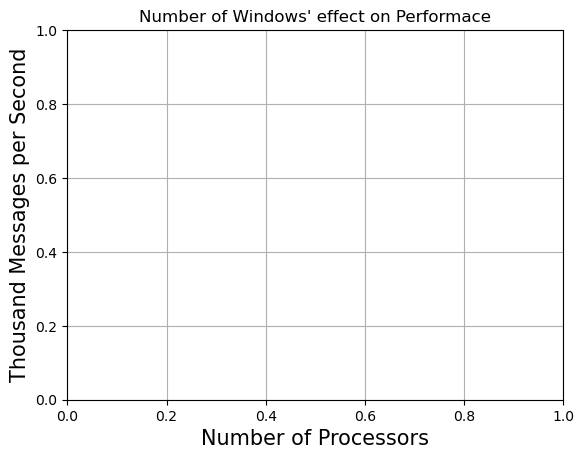

In [7]:
fig, ax = plt.subplots()
# sns.set(font_scale=1.1)
# df = dfAll.loc[dfAll['nWinPerAwait']==1]#.loc[dfAll['Windows'].isin([0,20,200])]
df = dfAll[['nActor', 'msgPerSec','Messages per Window']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Messages per Window'
    )

ax.set_xlabel('Number of Processors', fontsize=15)
ax.set_ylabel('Thousand Messages per Second', fontsize=15)

ax.grid()
ax.title.set_text('Number of Windows\' effect on Performace')
plt.show()

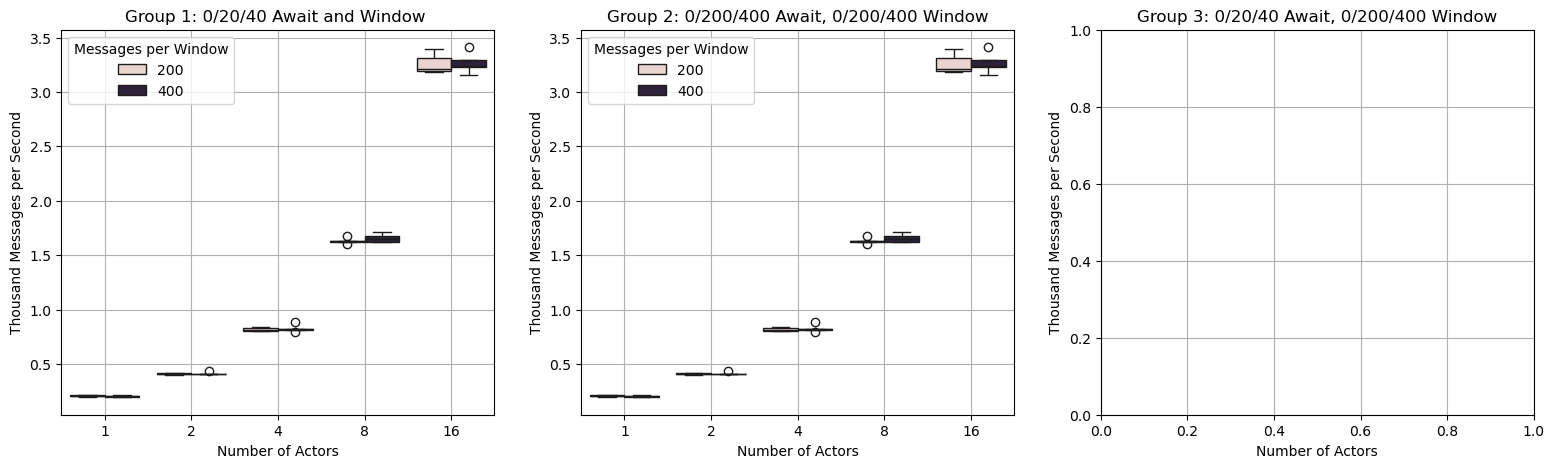

In [5]:
fig, axs = plt.subplots(1, 3, figsize = (19,5))

# plot 1
ax = axs[0]

df = dfAll.loc[dfAll['nWinPerAwait']==1].loc[dfAll['Messages per Window'].isin([0,200,400])]
df = df[['nActor', 'msgPerSec','Messages per Window']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Messages per Window'
    )

ax.set_xlabel('Number of Actors')
ax.set_ylabel('Thousand Messages per Second')

ax.grid()
ax.title.set_text('Group 1: 0/20/40 Await and Window ')

# plot 2
ax = axs[1]

df = dfAll.loc[dfAll['nWinPerAwait']==1].loc[dfAll['Messages per Window'].isin([0,200,400])]
df = df[['nActor', 'msgPerSec','Messages per Window']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Messages per Window'
    )

ax.set_xlabel('Number of Actors')
ax.set_ylabel('Thousand Messages per Second')

ax.grid()
ax.title.set_text('Group 2: 0/200/400 Await, 0/200/400 Window')

# plot 3
ax = axs[2]

df = dfAll.loc[dfAll['nWinPerAwait']==10].loc[dfAll['Messages per Window'].isin([200,400])]
df = pd.concat([df, dfAll.loc[dfAll['Messages per Window']==0]])
df = df[['nActor', 'msgPerSec','Messages per Window']]
p = sns.boxplot(
    x='nActor', 
    y='msgPerSec', 
    data=df, 
    ax = ax,
    hue='Messages per Window'
    )

ax.set_xlabel('Number of Actors')
ax.set_ylabel('Thousand Messages per Second')

ax.grid()
ax.title.set_text('Group 3: 0/20/40 Await, 0/200/400 Window')

plt.show()
fig.savefig('../../../target/ScalePlot.png', dpi=300)